# Practica 3

Un dataset de NOAA está almacenado en el archivo `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. Este es el dataset que utilizaremos para la práctica.

Nota: Los datos para esta práctica forman parte de un dataset perteneciente a The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) 
(https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). El GHCN-Daily se compone de registros climáticos diarios de miles de estaciones de la superficie terrestre en todo el mundo.

Cada fila en el archivo de datos corresponde a una sola observación.

Nos proporciona las siguientes variables:

- **id** : código de identificación de la estación
- **date** : fecha en formato YYYY-MM-DD (por ejemplo: 2012-01-24 = 24 de enero de 2012)
- **element** : indica el tipo de medición
    - **TMAX** : Temperatura máxima
    - **TMIN** : Temperatura mínima
- **value**: valor de la temperatura (en décimas de grados centígrados)

## Indicaciones

1. Lee la documentación y familiarícese con el conjunto de datos, luego escriba un código python que arroje un gráfico lineal de las temperaturas máximas y mínimas récord por día del año durante el período 2005-2014. El área entre las temperaturas máximas y mínimas récord de cada día debe estar sombreada.
2. Superponga una dispersión de los datos de 2015 para cualquier punto (máximos y mínimos) para los cuales se superó el récord de diez años (2005-2014) máximo o mínimo histórico en 2015.
3. Debes tener cuidado con los días bisiestos (es decir, el 29 de febrero), es totalmente razonable eliminar estos puntos del conjunto de datos para esta visualización.
4. ¡Haz que la imagen sea agradable! Considera problemas como leyendas, etiquetas y líneas en demasía.

Los datos proporcionados están cerca de **Ann Arbor, Michigan, Estados Unidos**, y las estaciones de donde provienen los datos se muestran en el siguiente mapa.

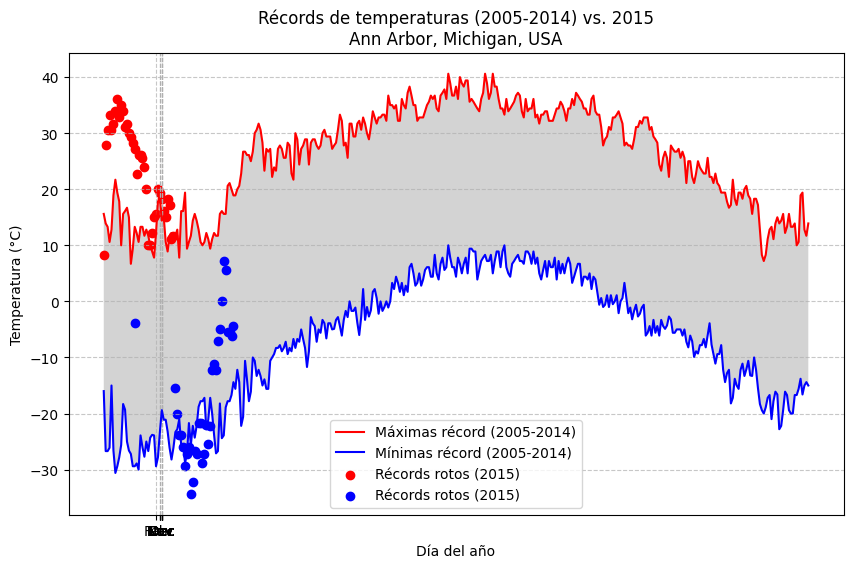

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Tu código a partir de aquí
df = pd.read_csv('../data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')

# Elimina los datos de febrero 29
df = df[~df['Date'].str.endswith('02-29')]

# Convierte los valores de temperatura a grados Celsius
df['Data_Value'] = df['Data_Value'] * 0.1

# Extrae  año y mes de la columna 'Date'
df['Year'] = df['Date'].str[:4]
df['Month_Day'] = df['Date'].str[5:]

# Filtra los datos para el período 2005-2014 y 2015
df_2005_2014 = df[df['Year'] != '2015']
df_2015 = df[df['Year'] == '2015']

#Calcula las temperaturas máximas y mínimas récord para cada día del año en el período 2005-2014:

max_temperatures_2005_2014 = df_2005_2014[df_2005_2014['Element'] == 'TMAX'].groupby('Month_Day')['Data_Value'].max()
min_temperatures_2005_2014 = df_2005_2014[df_2005_2014['Element'] == 'TMIN'].groupby('Month_Day')['Data_Value'].min()

#Calcula las temp. maximas y minimas récord en 2015:

max_temperatures_2015 = df_2015[df_2015['Element'] == 'TMAX'].groupby('Month_Day')['Data_Value'].max()
min_temperatures_2015 = df_2015[df_2015['Element'] == 'TMIN'].groupby('Month_Day')['Data_Value'].min()

#Encuentra los récords de temperatura max y min que se rompieron en 2015 en comparación con 2005-2014:

broken_max_records = max_temperatures_2015[max_temperatures_2015 > max_temperatures_2005_2014]
broken_min_records = min_temperatures_2015[min_temperatures_2015 < min_temperatures_2005_2014]

#Crea grafico de lineas para las temps. maxs y mins record en 2005-2014 y sombrea el área entre ellas:

plt.figure(figsize=(10, 6))
plt.plot(max_temperatures_2005_2014.values, color='r', label='Máximas récord (2005-2014)')
plt.plot(min_temperatures_2005_2014.values, color='b', label='Mínimas récord (2005-2014)')
plt.fill_between(range(len(max_temperatures_2005_2014)), min_temperatures_2005_2014, max_temperatures_2005_2014, facecolor='lightgray')

#Superpone una dispersion de los reeords de 2015 que se rompieron:

plt.scatter(broken_max_records.index, broken_max_records.values, color='red', label='Récords rotos (2015)')
plt.scatter(broken_min_records.index, broken_min_records.values, color='blue', label='Récords rotos (2015)')

#Configura el grafico con etiquetas, titulos y leyendas:

plt.xlabel('Dia del año')
plt.ylabel('Temperatura (°C)')
plt.title('Records de temperaturas (2005-2014) vs. 2015\nAnn Arbor, Michigan, USA')
plt.legend()

# Añade rango fechas en el eje x
date_range = pd.date_range(start='2015-01-01', end='2015-12-31', freq='M')
plt.xticks([x.day - 1 for x in date_range], [x.strftime('%b') for x in date_range])

# Añade una cuadricula
plt.grid(True, linestyle='--', alpha=0.7)

# Guarda el grafico como imagen
plt.savefig('temperature_records.png')

# Muestra gráfico
plt.show()











             